<!--HEADER-->
*Tutorial sobre Flux.jl - 2020/2 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

# Treinando redes neurais

* Para exemplificar, vamos treinar uma rede neural para aproximar uma dada função real.

* Vamos começar com um exemplo unidimensional.

* Em seguida, uma função bidimensional.

In [2]:
using Flux
using Random
using Plots
using ChainPlots

In [3]:
f(x) = 0.2*sin(4*π*x) + 0.3*exp(-x) + 4.0*x^6 - 3.5*x^5
data_x = reshape(collect(0:0.05:1), 1, :)
data_y = f.(data_x)
nothing

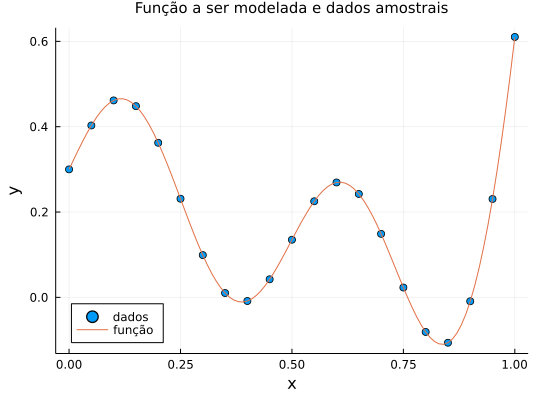

In [4]:
plot(data_x', data_y',
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Função a ser modelada e dados amostrais", titlefont=10)
plot!(0:0.01:1, f, size=(540,400), label="função")

### Escolhendo uma topologia de rede

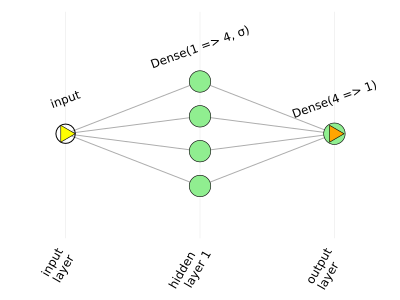

In [5]:
m = Chain(Dense(1, 4, σ), Dense(4,1))
plot(m, size=(400,300))

### Preparando o treinamento

In [6]:
m[1].weight[1:end] = [5.0, -5.0, -5.0, -5.0]
m[1].bias[1:end] = [-0.0, -0.0, 0.0, 0.0]
m[2].weight[1:end] = [5.0, -2.0, 5.0, -5.0]
m[2].bias[1:end] = [0.0]
nothing

In [7]:
data=[(data_x, data_y)] # formatando os dados com um vetor de tuples

loss(x, y) = Flux.Losses.mse(m(x), y) # erro quadrático médio

opt = ADAM() # escolha do algoritmo 

function cb(i) # função de call-back, executada a cada iteração
    if rem(i, 1000) == 0
        @show i, loss(data_x,data_y)
    end
    return nothing
end

ps = Flux.params(m) # parâmetros a serem treinados: todos, nesse caso

Params([Float32[5.0; -5.0; -5.0; -5.0;;], Float32[-0.0, -0.0, 0.0, 0.0], Float32[5.0 -2.0 5.0 -5.0], Float32[0.0]])

### Treinando

In [8]:
n_epochs = 10_000
for i in 1:n_epochs
    Flux.train!(loss, ps, data, opt; cb = () -> cb(i))
end

(i, loss(data_x, data_y)) = (1000, 3.9608817820552633)
(i, loss(data_x, data_y)) = (2000, 0.9905493843587769)
(i, loss(data_x, data_y)) = (3000, 0.1750923816691597)
(i, loss(data_x, data_y)) = (4000, 0.0642560078849153)
(i, loss(data_x, data_y)) = (5000, 0.033701869673784954)
(i, loss(data_x, data_y)) = (6000, 0.027647704407900705)
(i, loss(data_x, data_y)) = (7000, 0.02621201769782013)
(i, loss(data_x, data_y)) = (8000, 0.024989508101856094)
(i, loss(data_x, data_y)) = (9000, 0.023894961948166475)
(i, loss(data_x, data_y)) = (10000, 0.02310667128668522)


### Visualizando o resultado

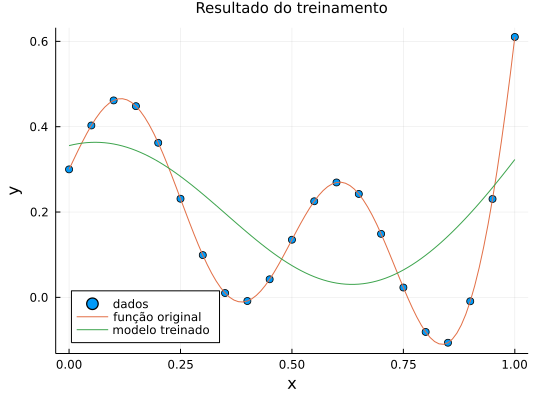

In [9]:
plot(data_x', data_y',
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Resultado do treinamento", titlefont=10)
plot!(0:0.01:1, f, size=(540,400), label="função original")
plot!(0:0.01:1, m(reshape(collect(0:0.01:1), 1, :))',
    size=(540,400), label="modelo treinado", legend=:bottomleft)

In [12]:
Flux.params(m)

Params([Float32[2.985783; -2.4466367; -3.740463; -2.1470976;;], Float32[-0.5707323, 1.1733766, 1.3036107, 1.2576736], Float32[3.2166038 -1.2613834 6.533819 -4.3120713], Float32[-1.6233182]])

### Treinando por mais épocas

In [13]:
function cb(i=1; istep=1000, show_loss = true, show_plot=false) # função de call-back, executada a cada iteração
    if rem(i, istep) == 0
        if show_loss
            @show i, loss(data_x,data_y)
        end
        if show_plot
            plot!(0:0.01:1, m(reshape(collect(0:0.01:1), 1, :))', legend=false, ylims=(-0.2,1))
            frame(anim)
        end
    end
    return nothing
end

cb (generic function with 2 methods)

┌ Info: Saved animation to 
│   fn = /Users/rrosa/Documents/git_repositories/julia/TutorialFlux/notebooks/img/train1D.gif
└ @ Plots /Users/rrosa/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/Users/rrosa/Documents/git_repositories/julia/TutorialFlux/notebooks/img/train1D.gif")
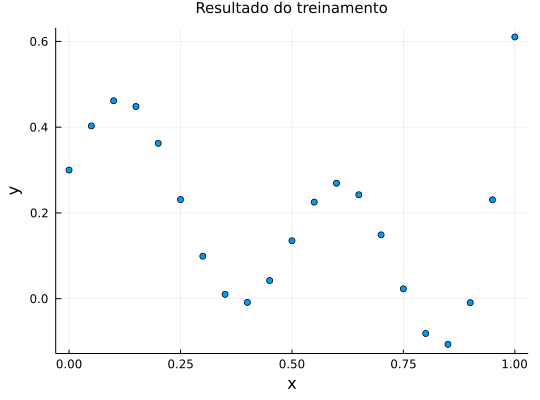

In [11]:
anim = Animation()
plot(data_x', data_y',
    seriestype=:scatter, size=(540,400), label="dados", legend=false,
    xaxis = "x", yaxis = "y",
    title="Resultado do treinamento", titlefont=10)
frame(anim)

n_epochs = 40_000
n_show = 0
for i in 1:n_epochs
    Flux.train!(loss, ps, data, opt; cb = () -> cb(i, istep=1000, show_loss=false, show_plot=true))
end

gif(anim, joinpath("img","train1D.gif"))

In [14]:
Flux.params(m)

Params([Float32[2.985783; -2.4466367; -3.740463; -2.1470976;;], Float32[-0.5707323, 1.1733766, 1.3036107, 1.2576736], Float32[3.2166038 -1.2613834 6.533819 -4.3120713], Float32[-1.6233182]])

### Outros parâmetros iniciais

In [15]:
m[1].weight[1:end] .= 10.0
m[1].bias[1:end] .= 0.0
m[2].weight[1:end] .= 10.0
m[2].bias[1:end] .= 0.0
nothing

In [16]:
n_epochs = 100_000
for i in 1:n_epochs
    Flux.train!(loss, ps, data, opt; cb = () -> cb(i, istep=5000))
end

(i, loss(data_x, data_y)) = (5000, 8.154991177403094)
(i, loss(data_x, data_y)) = (10000, 0.7197407475513008)
(i, loss(data_x, data_y)) = (15000, 0.060635500498070774)
(i, loss(data_x, data_y)) = (20000, 0.03856743477678928)
(i, loss(data_x, data_y)) = (25000, 0.035767948503859684)
(i, loss(data_x, data_y)) = (30000, 0.027703843671827006)
(i, loss(data_x, data_y)) = (35000, 0.02754308787923793)
(i, loss(data_x, data_y)) = (40000, 0.0274851313981726)
(i, loss(data_x, data_y)) = (45000, 0.02508390722494597)
(i, loss(data_x, data_y)) = (50000, 0.0206745124722177)
(i, loss(data_x, data_y)) = (55000, 0.020089108523596737)
(i, loss(data_x, data_y)) = (60000, 0.01997299491563182)
(i, loss(data_x, data_y)) = (65000, 0.019941002161805197)
(i, loss(data_x, data_y)) = (70000, 0.019932615121863673)
(i, loss(data_x, data_y)) = (75000, 0.019923411806210305)
(i, loss(data_x, data_y)) = (80000, 0.01991919055283103)
(i, loss(data_x, data_y)) = (85000, 0.01991645578732752)
(i, loss(data_x, data_y)) = (9

### Visualizando o resultado

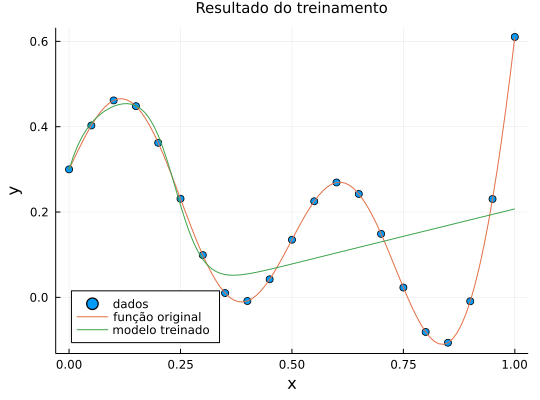

In [17]:
plot(data_x', data_y',
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Resultado do treinamento", titlefont=10)
plot!(0:0.01:1, f, size=(540,400), label="função original")
plot!(0:0.01:1, m(reshape(collect(0:0.01:1), 1, :))',
    size=(540,400), label="modelo treinado", legend=:bottomleft)

### Treinando por mais tempo

In [25]:
Descent()

Descent(0.1)

### Aumentando o número de neurônios na camada oculta

* Observe que é preciso atualizar a função objetivo e os parâmetros ajustáveis para a nova rede!

In [18]:
m = Chain(Dense(1,10, tanh), Dense(10,1))

Chain(
  Dense(1 => 10, tanh),                 # 20 parameters
  Dense(10 => 1),                       # 11 parameters
)                   # Total: 4 arrays, 31 parameters, 380 bytes.

In [32]:
# é preciso atualizar para a nova rede!
loss(x, y) = Flux.Losses.mse(m(x), y)
ps = Flux.params(m)
n_epochs = 30_000
for i in 1:n_epochs
    Flux.train!(loss, ps, data, Descent(); cb = () -> cb(i))
end

(i, loss(data_x, data_y)) = (1000, 2.2241383979694628e-5)
(i, loss(data_x, data_y)) = (2000, 2.1989495222591364e-5)
(i, loss(data_x, data_y)) = (3000, 2.175958556540827e-5)
(i, loss(data_x, data_y)) = (4000, 2.154603011990553e-5)
(i, loss(data_x, data_y)) = (5000, 2.1344727012495298e-5)
(i, loss(data_x, data_y)) = (6000, 2.1152195326589277e-5)
(i, loss(data_x, data_y)) = (7000, 2.0969065071730172e-5)
(i, loss(data_x, data_y)) = (8000, 2.0794057084058178e-5)
(i, loss(data_x, data_y)) = (9000, 2.0626248234708852e-5)
(i, loss(data_x, data_y)) = (10000, 2.0464985043254825e-5)
(i, loss(data_x, data_y)) = (11000, 2.030701906927502e-5)
(i, loss(data_x, data_y)) = (12000, 2.0152273715925e-5)
(i, loss(data_x, data_y)) = (13000, 2.0001527166841678e-5)
(i, loss(data_x, data_y)) = (14000, 1.985408596508527e-5)
(i, loss(data_x, data_y)) = (15000, 1.970843366765965e-5)
(i, loss(data_x, data_y)) = (16000, 1.956487434702499e-5)
(i, loss(data_x, data_y)) = (17000, 1.9425180571008505e-5)
(i, loss(data_x

### Visualizando o resultado

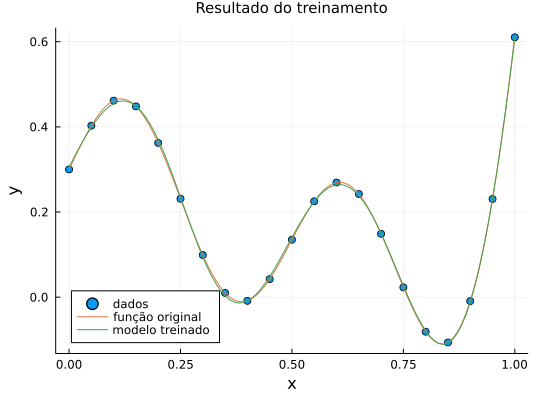

In [33]:
plot(data_x', data_y',
    seriestype=:scatter, size=(540,400), label="dados", legend=:bottomleft,
    xaxis = "x", yaxis = "y",
    title="Resultado do treinamento", titlefont=10)
plot!(0:0.01:1, f, size=(540,400), label="função original")
plot!(0:0.01:1, m(reshape(collect(0:0.01:1), 1, :))',
    size=(540,400), label="modelo treinado", legend=:bottomleft)

## Exemplo bidimensional

* Vamos considerar agora um exemplo com uma função bidimensional, ou seja com dois sinais de entrada.

In [19]:
#fB(x::Real,y::Real) = (x-y)^2 + exp((1-sin(x))^2)*cos(y) + exp((1-cos(y))^2)*sin(y)
fB(x::Real,y::Real) = sin(x)*sin(y)
fB(u::Vector{Real}) = f_B(first(u), last(u))

fB (generic function with 2 methods)

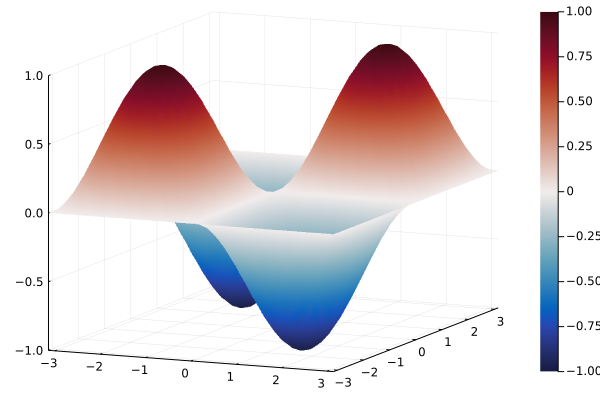

In [20]:
surface(-π:π/20:π, -π:π/20:π, fB, c=:balance)

### Preparando a amostra de dados

In [21]:
dataB_f = [(x,y,fB(x,y)) for x=-π:π/5:π, y=-π:π/5:π]
dataB_x = reshape(map(x->x[1], dataB_f), 1, :)
dataB_y = reshape(map(x->x[2], dataB_f), 1, :)
dataB_z = reshape(map(x->x[3], dataB_f), 1, :)
dataB = [(dataB_x, dataB_y, dataB_z)]
nothing

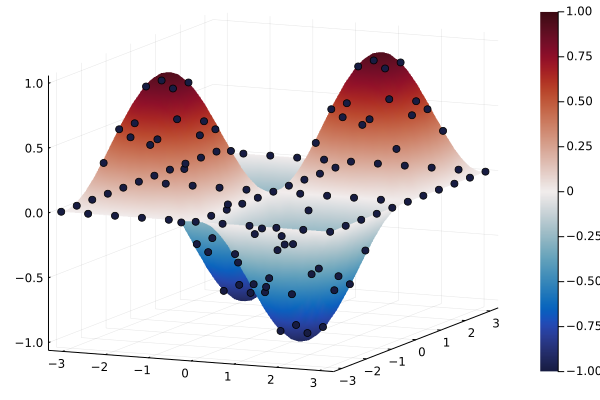

In [22]:
scatter!(dataB, dataseries=:scatter, c=:balance, legend=false)

### Construindo e inicializando a rede

* A inicialização já é aleatória.

* Fixamos a "semente" apenas para fins didáticos.

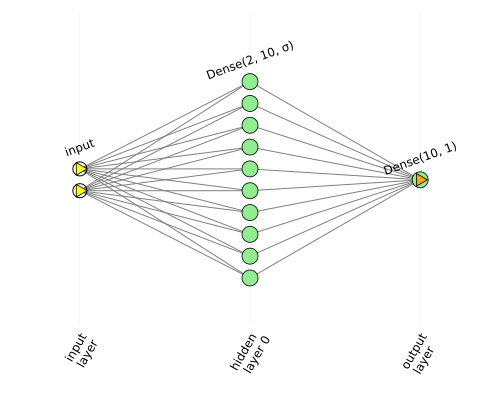

In [23]:
mB = Chain(Dense(2,10, σ), Dense(10,1))
m[1].weight[1:end] .= rand(MersenneTwister(123),length(m[1].weight))
m[1].bias[1:end] .= rand(MersenneTwister(124),length(m[1].bias))
m[1].weight[1:end] .= rand(MersenneTwister(125),length(m[2].weight))
m[1].bias[1:end] .= rand(MersenneTwister(126),length(m[2].bias))
plot(mB, size=(500,400))

### Preparando o treinamento

In [24]:
lossB(x, y, z) = Flux.Losses.mse(mB(vcat(x,y)), z) # erro quadrático médio

opt = ADAM() # escolha do algoritmo 

function cbB(i; istep = 1000) # função de call-back, executada a cada iteração
    if rem(i, istep) == 0
        @show i, lossB(dataB_x, dataB_y, dataB_z)
    end
    return nothing
end

ps = Flux.params(mB) # parâmetros a serem treinados: todos, nesse caso

Params([Float32[-0.4622432 0.23781747; -0.15288448 0.3444908; … ; -0.30932903 0.32001966; 0.6349168 -0.41487116], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.64239186 0.6760461 … -0.5771986 0.08226423], Float32[0.0]])

### Treinando

In [25]:
n_epochs = 20_000
for i in 1:n_epochs
    Flux.train!(lossB, ps, dataB, opt; cb = () -> cbB(i, istep=1000))
end

(i, lossB(dataB_x, dataB_y, dataB_z)) = (1000, 0.14365470725207805)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (2000, 0.09393433101219711)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (3000, 0.056963615313330065)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (4000, 0.031426877987246374)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (5000, 0.017986768163831254)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (6000, 0.010643220118937976)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (7000, 0.007197765946092614)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (8000, 0.00518174120194973)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (9000, 0.004158949947693159)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (10000, 0.003579698534957653)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (11000, 0.001981805262202572)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (12000, 0.0015757248188741967)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (13000, 0.0014398385400418898)
(i, lossB(dataB_x, dataB_y, dataB_z)) = (14000, 0.0013631080258888729)
(i, lossB(dataB_x, dataB_y, d

### Visualizando o resultado

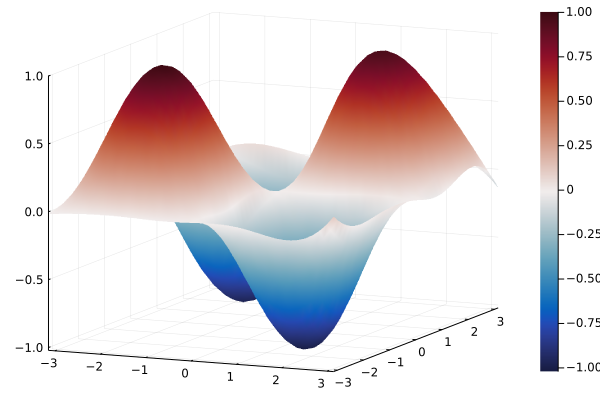

In [26]:
fmB(x,y) = mB([x,y])[1]
surface(-π:π/20:π, -π:π/20:π, fmB, c=:balance)

### Resíduo

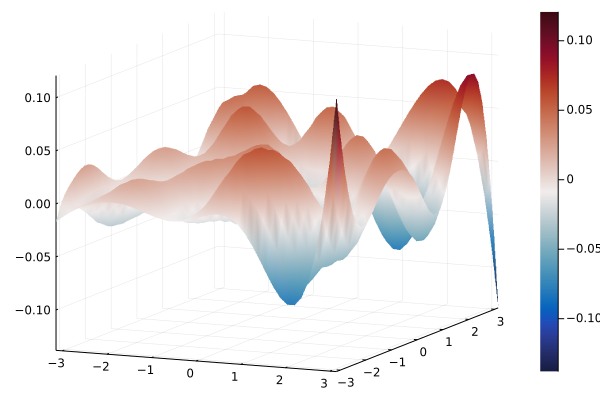

In [27]:
residuo(x,y) = fmB(x,y) - fB(x,y)
surface(-π:π/20:π, -π:π/20:π, residuo, c=:balance)